In [2]:
# Importing all the necessary basic libraries.,
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Loading the data

In [3]:
oo = pd.read_excel("C:/Users/HARIKRISHNAN M/Downloads/iris_new.xls")
oo.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
oo.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
oo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Null Value Detection

In [6]:
oo.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [7]:
freqgraph = oo[['SL','SW','PL']]
freqgraph

,SL,SW,PL
0,5.1,3.5,1.4
1,4.9,3.0,1.4
2,NaN,3.2,1.3
3,4.6,3.1,1.5
4,5.0,3.6,1.4
...,...,...,...
145,6.7,3.0,5.2
146,6.3,2.5,5.0
147,6.5,3.0,NaN
148,6.2,3.4,5.4


array([[<AxesSubplot:title={'center':'SL'}>,
        <AxesSubplot:title={'center':'SW'}>],
       [<AxesSubplot:title={'center':'PL'}>, <AxesSubplot:>]],
      dtype=object)

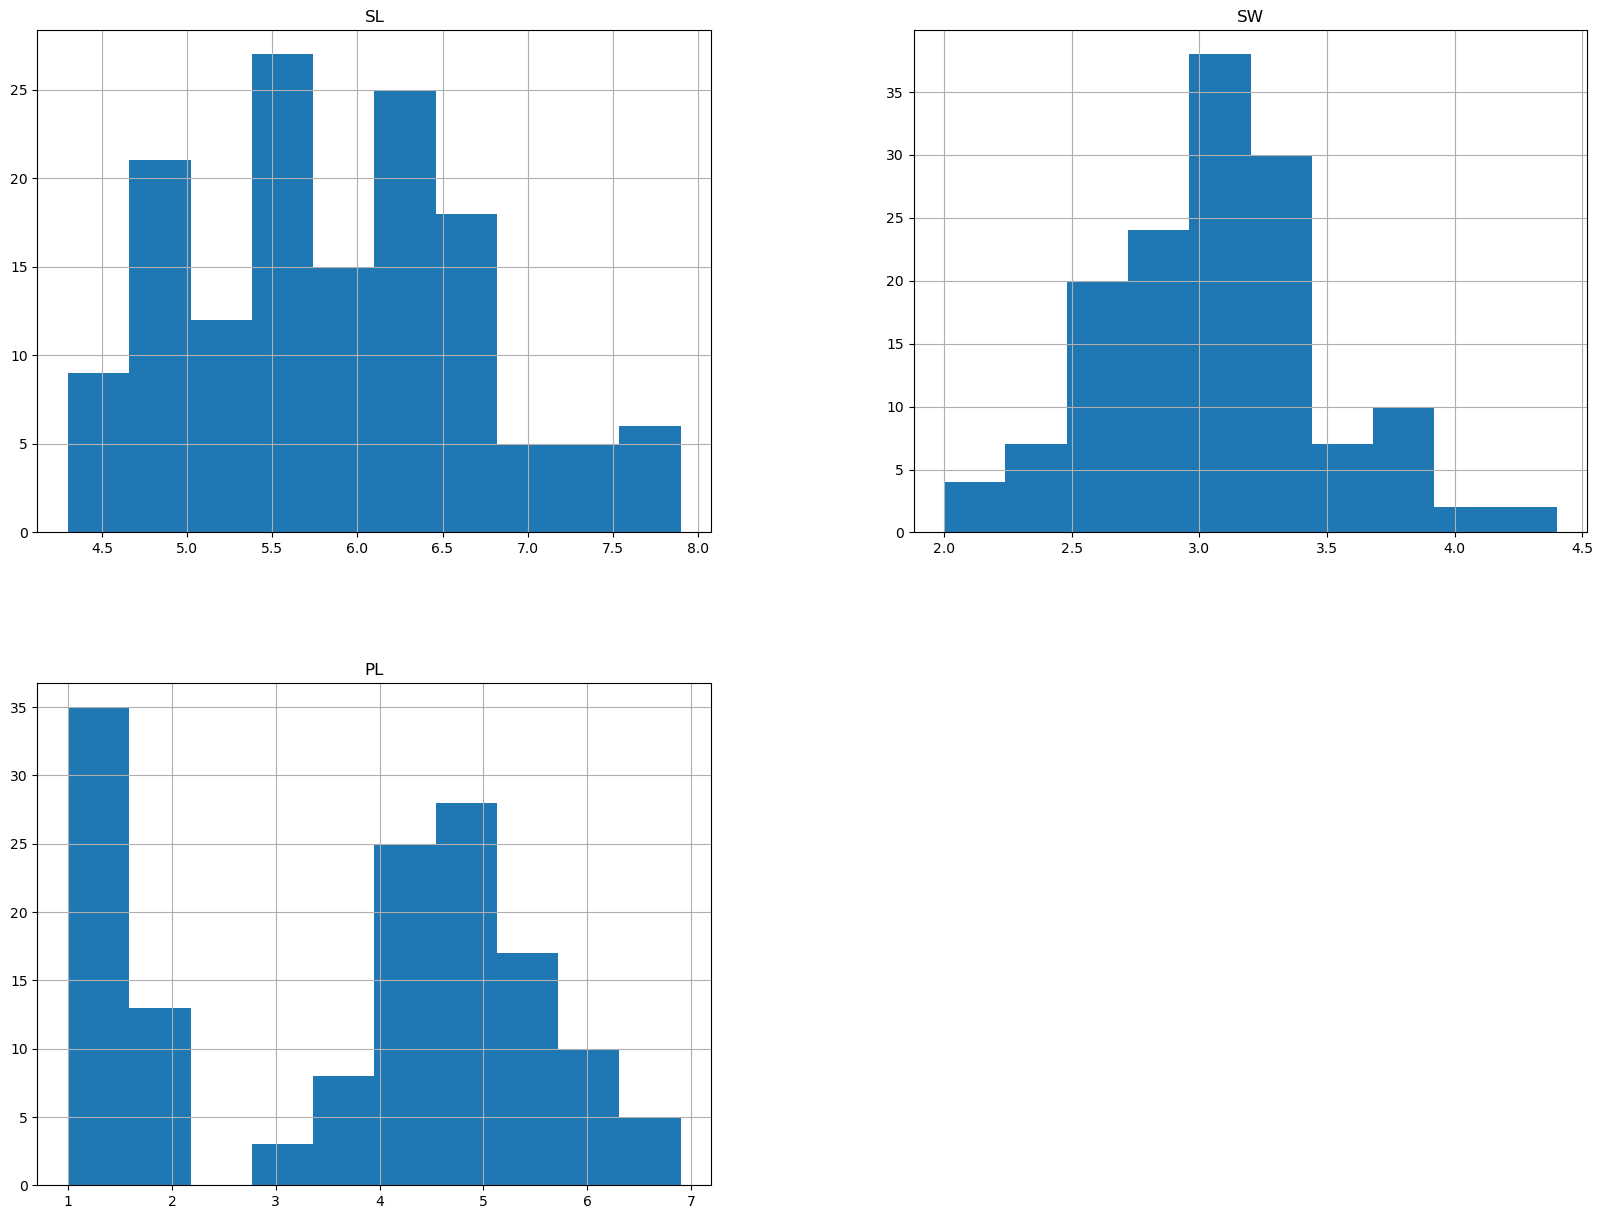

In [8]:
freqgraph.hist(figsize=(20,15))

Since the distribution is not normal, we prefer median() fill the null values

In [9]:
for a in ['SL']:
    oo[a] = oo[a].fillna(oo[a].median())

for a in['SW']:
    oo[a] = oo[a].fillna(oo[a].median())

for a in ['PL']:
    oo[a] = oo[a].fillna(oo[a].median())

In [10]:
oo.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [11]:
oo.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,5.8,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
boxgraph = oo[['SL','SW','PL','PW']]
boxgraph

,SL,SW,PL,PW
0,5.1,3.5,1.40,0.2
1,4.9,3.0,1.40,0.2
2,5.8,3.2,1.30,0.2
3,4.6,3.1,1.50,0.2
4,5.0,3.6,1.40,0.2
...,...,...,...,...
145,6.7,3.0,5.20,2.3
146,6.3,2.5,5.00,1.9
147,6.5,3.0,4.35,2.0
148,6.2,3.4,5.40,2.3


<AxesSubplot:>

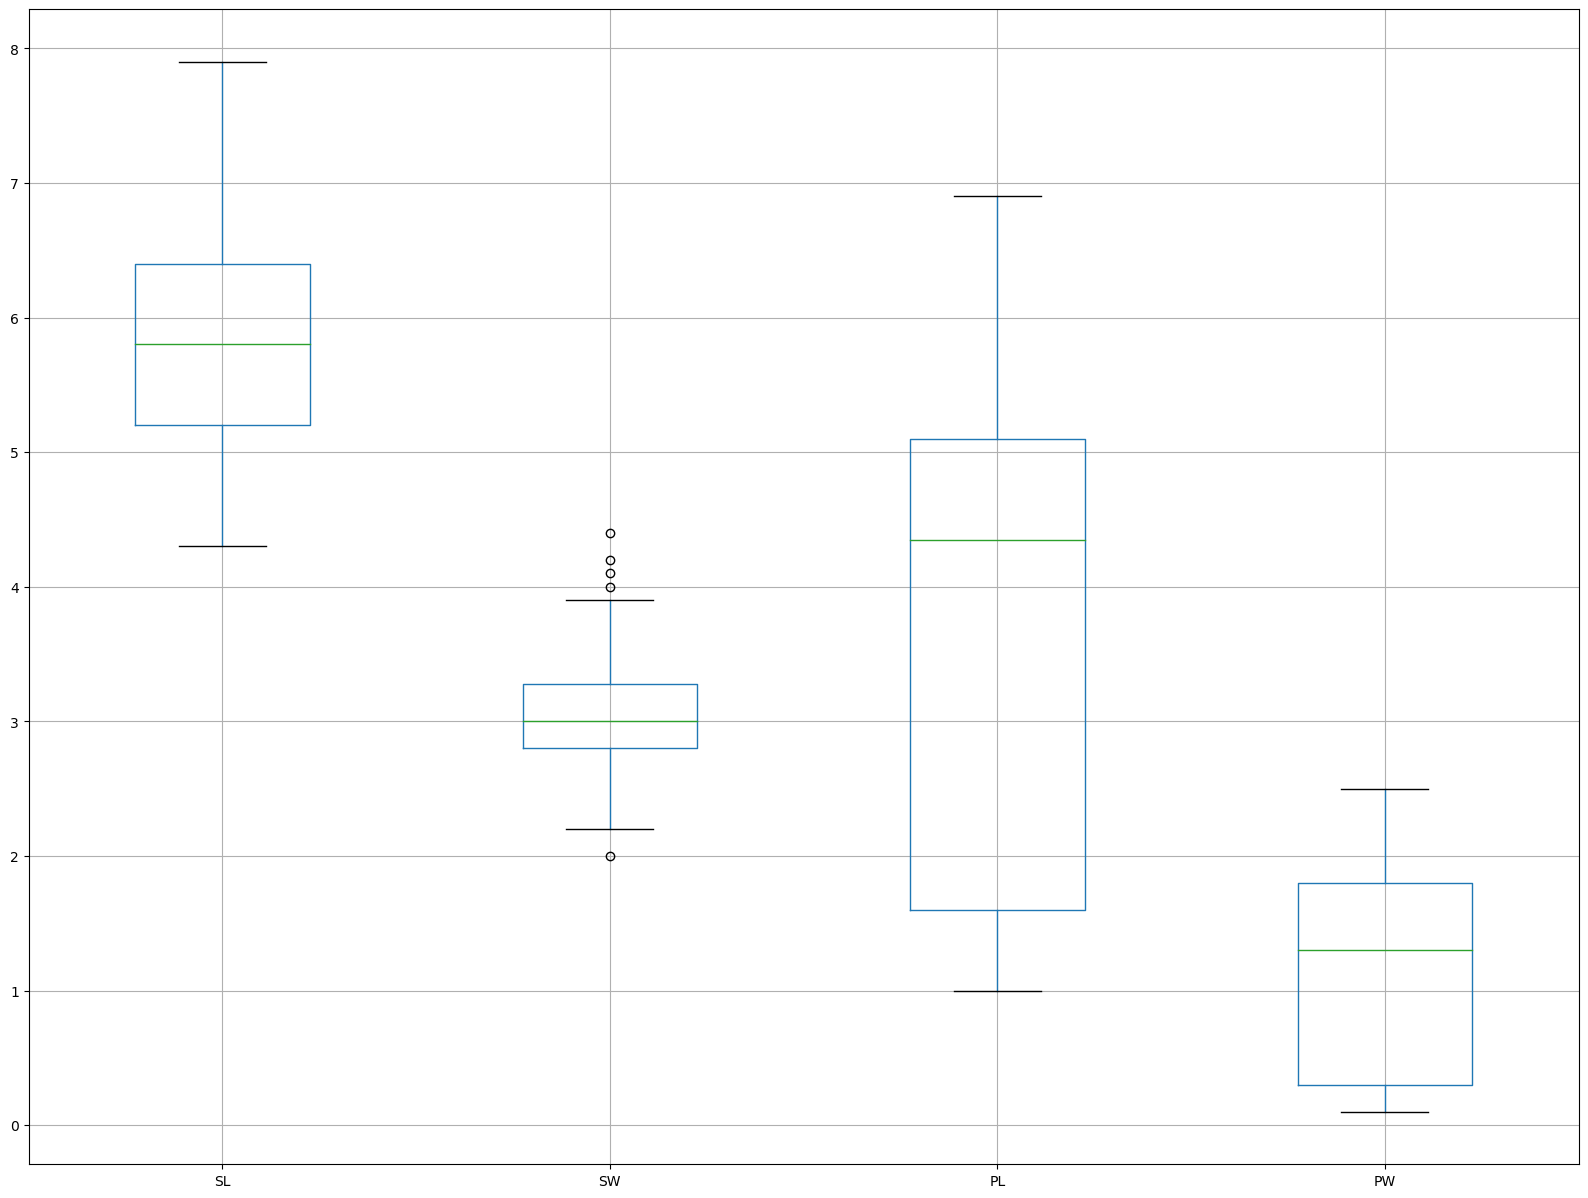

In [13]:
boxgraph.boxplot(figsize=(20,15))

### Outlier detection

Outliers are present in SW and since SW is sepal width,those outliers can be removed for an efficient modelling.

In [14]:
Q1 = np.percentile(oo.SW,25,interpolation='midpoint')
Q2 = np.percentile(oo.SW,50,interpolation='midpoint')
Q3 = np.percentile(oo.SW,75,interpolation='midpoint')
Q1, Q2, Q3

(2.8, 3.0, 3.25)

In [15]:
IQR = Q3-Q1
IQR

0.4500000000000002

In [16]:
low_limit = Q1 - 1.5*IQR
up_limit = Q3 + 1.5*IQR
low_limit, up_limit

(2.1249999999999996, 3.9250000000000003)

In [17]:
outlier1 = []
for x in oo.SW:
    if(x<low_limit):
        outlier1.append(x)

outlier2 = []
for x in oo.SW:
    if(x>up_limit):
        outlier2.append(x)
outlier1,outlier2

([2.0], [4.0, 4.4, 4.1, 4.2])

In [18]:
oo.drop(oo[oo.SW < low_limit].index, inplace=True)
oo.drop(oo[oo.SW > up_limit].index, inplace=True)

### Min Max Scaling

In [20]:
oo.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [21]:
X = oo.drop('Classification',axis=1)
X

,SL,SW,PL,PW
0,5.1,3.5,1.40,0.2
1,4.9,3.0,1.40,0.2
2,5.8,3.2,1.30,0.2
3,4.6,3.1,1.50,0.2
4,5.0,3.6,1.40,0.2
...,...,...,...,...
145,6.7,3.0,5.20,2.3
146,6.3,2.5,5.00,1.9
147,6.5,3.0,4.35,2.0
148,6.2,3.4,5.40,2.3


In [22]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler(feature_range=(0,1))
X = minmax.fit_transform(X)

In [23]:
X = pd.DataFrame(X, columns = ['SL', 'SW', 'PL', 'PW'])
X

,SL,SW,PL,PW
0,0.222222,0.764706,0.067797,0.041667
1,0.166667,0.470588,0.067797,0.041667
2,0.416667,0.588235,0.050847,0.041667
3,0.083333,0.529412,0.084746,0.041667
4,0.194444,0.823529,0.067797,0.041667
...,...,...,...,...
140,0.666667,0.470588,0.711864,0.916667
141,0.555556,0.176471,0.677966,0.750000
142,0.611111,0.470588,0.567797,0.791667
143,0.527778,0.705882,0.745763,0.916667


In [24]:
X.describe()

,SL,SW,PL,PW
count,145.000000,145.000000,145.000000,145.000000
mean,0.435441,0.484381,0.482642,0.469540
std,0.226896,0.220208,0.290214,0.315925
min,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.352941,0.101695,0.083333
50%,0.416667,0.470588,0.567797,0.500000
75%,0.583333,0.588235,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


In [25]:
Y = oo['Classification']

In [26]:
oo[['Classification']].values

array([['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-se

### Split the Dataset

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25, random_state = 42)
#if test size is 0.25 then total wud be 100, if it is 0.2 then total wud be 80 as 4 sets are made so multiply by 4

### Logarithmic Regression

In [28]:
#log regression
from sklearn.linear_model import LogisticRegression
# log_reg=LogisticRegression(multi_class='multinomial', solver='lbfgs')
log_reg=LogisticRegression()
model1 = log_reg.fit(X_train,Y_train)
Y_pred_logreg = model1.predict(X_test)

In [29]:
#metrics
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import classification_report
report = classification_report(Y_test,Y_pred_logreg)
print(report)
print(confusion_matrix(Y_test,Y_pred_logreg))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.82      1.00      0.90         9
 Iris-virginica       1.00      0.86      0.92        14

       accuracy                           0.95        37
      macro avg       0.94      0.95      0.94        37
   weighted avg       0.96      0.95      0.95        37

[[14  0  0]
 [ 0  9  0]
 [ 0  2 12]]


### kNN

C:\Users\HARIKRISHNAN M\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\HARIKRISHNAN M\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be acce

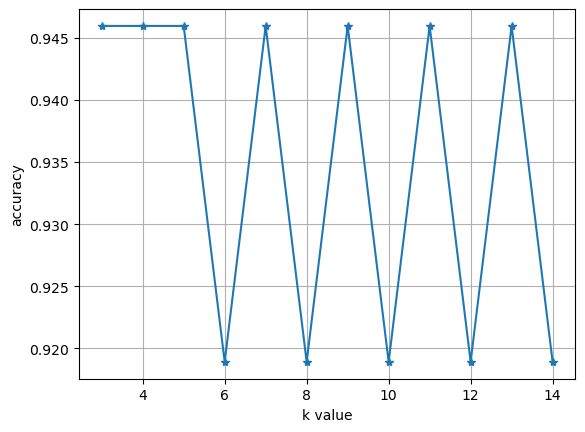

In [30]:
#knn
from sklearn.neighbors import KNeighborsClassifier
metric_k = []
neighbours = np.arange(3,15)

for k in neighbours:
        knn = KNeighborsClassifier(n_neighbors=k)
        model2 = knn.fit(X_train, Y_train)
        Y_pred_knn = model2.predict(X_test)
        acc=accuracy_score(Y_test,Y_pred_knn)
        metric_k.append(acc)

plt.plot(neighbours,metric_k,'*-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [ ]:
#taking k value as 5

In [41]:
knn = KNeighborsClassifier(n_neighbors=5)
model2 = knn.fit(X_train, Y_train)
Y_pred_knn = model2.predict(X_test)

#metrics
print(confusion_matrix(Y_test,Y_pred_knn))
report = classification_report(Y_test,Y_pred_knn)
print(report)

[[14  0  0]
 [ 0  8  1]
 [ 0  1 13]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.89      0.89      0.89         9
 Iris-virginica       0.93      0.93      0.93        14

       accuracy                           0.95        37
      macro avg       0.94      0.94      0.94        37
   weighted avg       0.95      0.95      0.95        37



C:\Users\HARIKRISHNAN M\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


### SVM Linear kernel

In [42]:
from sklearn.svm import SVC
#svm linear
svm_clf = SVC(kernel='linear')
svm_model = svm_clf.fit(X_train, Y_train)
Y_pred_svml = svm_clf.predict(X_test)

#metrics
print(confusion_matrix(Y_test,Y_pred_svml))
report = classification_report(Y_test,Y_pred_svml)
print(report)

[[14  0  0]
 [ 0  9  0]
 [ 0  3 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.75      1.00      0.86         9
 Iris-virginica       1.00      0.79      0.88        14

       accuracy                           0.92        37
      macro avg       0.92      0.93      0.91        37
   weighted avg       0.94      0.92      0.92        37



### SVM Polynomial kernel

In [49]:
from sklearn.svm import SVC
#svm poly
svm_clf = SVC(kernel='poly',degree=2)
svm_model = svm_clf.fit(X_train, Y_train)
Y_pred_svmp = svm_clf.predict(X_test)

#metrics
print(confusion_matrix(Y_test,Y_pred_svmp))
report = classification_report(Y_test,Y_pred_svmp)
print(report)

[[14  0  0]
 [ 0  8  1]
 [ 0  1 13]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.89      0.89      0.89         9
 Iris-virginica       0.93      0.93      0.93        14

       accuracy                           0.95        37
      macro avg       0.94      0.94      0.94        37
   weighted avg       0.95      0.95      0.95        37



### SVM Rbf kernel

In [51]:
from sklearn.svm import SVC
#svm rbf
svm_clf = SVC(kernel='rbf')
svm_model = svm_clf.fit(X_train, Y_train)
Y_pred_rbf = svm_clf.predict(X_test)

#metrics
print(confusion_matrix(Y_test,Y_pred_rbf))
report = classification_report(Y_test,Y_pred_rbf)
print(report)

[[14  0  0]
 [ 0  8  1]
 [ 0  1 13]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.89      0.89      0.89         9
 Iris-virginica       0.93      0.93      0.93        14

       accuracy                           0.95        37
      macro avg       0.94      0.94      0.94        37
   weighted avg       0.95      0.95      0.95        37



### Decision tree

In [52]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
dtm_clf = DecisionTreeClassifier(random_state = 42)
dtm_clf.fit(X_train, Y_train)
Y_pred_dtm = dtm_clf.predict(X_test)

#metrics
print(confusion_matrix(Y_test,Y_pred_dtm))
report = classification_report(Y_test,Y_pred_dtm)
print(report)

[[14  0  0]
 [ 0  8  1]
 [ 0  2 12]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.80      0.89      0.84         9
 Iris-virginica       0.92      0.86      0.89        14

       accuracy                           0.92        37
      macro avg       0.91      0.92      0.91        37
   weighted avg       0.92      0.92      0.92        37



### Random forest Model

In [53]:
#random forest model
from sklearn.ensemble import RandomForestClassifier
rfm_clf = RandomForestClassifier(random_state = 42)
rfm_clf.fit(X_train, Y_train)
Y_pred_rfm = rfm_clf.predict(X_test)

#metrics
print(confusion_matrix(Y_test,Y_pred_rfm))
report = classification_report(Y_test,Y_pred_rfm)
print(report)

[[14  0  0]
 [ 0  8  1]
 [ 0  1 13]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.89      0.89      0.89         9
 Iris-virginica       0.93      0.93      0.93        14

       accuracy                           0.95        37
      macro avg       0.94      0.94      0.94        37
   weighted avg       0.95      0.95      0.95        37



### The best model is Logarithimic Regression model